# Lab 5
Here are some stuffs for Lab 5!
___


## Overview

- This lab might seem a little too long but eventually it is not that bad. 

- You need an image editor to annotate your screenshots. E.g. Paint, Preview, PS.

- We will need to plot 2 graphs from LoggerPro.

- Excel work will start this week.

```{attention}
Please read the instructions in the manual on how to use the simulator!
```

## Part 1: The Electric Dipole
````{margin}
```{tip}
Electric field lines are going from higher potential to lower potential and perpendicular to equipotential lines.
```
````
- Here, you need place <mark><b>2 opposite charges</b></mark> on 2 halves of the surface (one left and one right).
- Then, use the device with the **cross-hair** to draw the equipotential lines. How? **Click the pencil**.
- Make sure you follow the required steps (not necessarily exact). In this case, it is $\pm3(V)$.
- Then, you need to draw **Electric field Lines** given the equipotential lines.
- Here a demo for you to follow:

```{figure} ../../images/lab5/part1.png
:scale: 50
```

```{warning}
Every image contains metadata, including author and created date. So, I would know whether you did it or copied somewhere.
```

## Part 2: Pair of Like Charges
````{margin}
```{tip}
In case you don't see the potential you're looking for, move the device up and down from the middle.
```
````
- The procedure is similar to part 1. The only difference is that you place <mark><b>2 same charges</b></mark> on 2 halves of the surface.
- Make sure you follow the required steps (not necessarily exact). In this case, it is $\pm1(V)$.
- Then, draw the **Electric field lines**. Here is a demo for you:

```{figure} ../../images/lab5/part2.png
:scale: 41
```
```{caution}
Here, we have 2 like-charges. So be careful with the direction of the electric field lines.
```


## Part 3: A Line of Charge
````{margin}
```{tip}
Keep track on the number of charges. Usually ~55-58 charges.
```
````
- This part requires you to assemble a **line of charges**. Make sure to <font color='red'><b>fill the entire browswer length</b></font>.
- Then, **section 2 requires readings from cross-haired device** and **section 3 requries a sensor**.

```{seealso}
Filling the entire length ensures that it behaves like a line of charges. Otherwise, some discrepancies might happen.
```

- Here is demo of the setup for you to follow:

```{figure} ../../images/lab5/part3.png
:scale: 40
```
### Section 1: Find the charge per unit length λ

- You have the equation:

$$\lambda = \frac{n * q}{L} (C/m)$$

where:
- n (number of charges). 
- q (charge per point)
- L (length of line).

```{tip}
q is given in the simulator! Find it! Use nC or C.
```
- So, you need to keep track on how many points you put in. Also, to find the length of the line, **use the scale with the plus symbol at the tip**.


### Section 2: Find estimated eletrical field strength Ex (V/m) at a point

- Remember: We <font color='red'><b>analyze at the middle of the line</b></font>.
- What you need to collect data is simple:
    - Step 1: Using the **scale** to find the distance x from the **line midpoint**. Starting from **0.1m** with step of **0.1m**.
    - Step 2: Use the crossed-hair device to read the potential Vx at that point.
    - Step 3: Record distance x and Vx in Logger Pro.
    - Step 4: Repeat until your you gather at least 12 points.
```{caution}
Tagent tool is interactive, so it only show the currently selected point.
``` 

- After data collection, you need to:
    - Step 1: Use **tagent tool** to find slope at all points!
    - Step 2: **Choose a point** (Example: x = 0.605m). 
    - Step 3: Go back to your simulator and place a **sensor** at that distance from midpoint.
    - Step 4: Read the value of Ex from the sensor and compare it to the slope.
    
```{caution}
Reading from sensor gave absolute values of Ex.
``` 

- Here is a demo for Part 3 section 3:

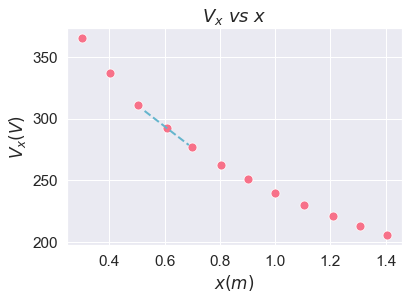

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Loading dada
part3_2 = (pd.read_csv("part3_2.csv", delimiter=",", dtype=float)
             .rename(columns={"x(m)":"x", "Vx(V)":"Vx"})
          )
part3_3 = (pd.read_csv("part3_3.csv", delimiter=",", dtype=float)
             .rename(columns={"1/x(1/m)":"1/x", "Ex(V/m)":"Ex"})
          )
# Settings
# Set seaborn themes
sns.set_theme(context='notebook',style='darkgrid', font_scale=1.4)
# sns.despine(left=True, bottom=True)
sns.set_palette("husl", 5)


# Plotting
plot = (sns.scatterplot(x="x", y="Vx",data=part3_2, legend = False, s=80,linewidths=0.7, edgecolor='w')
)
# Add title to only this subgraph
plot.set_title(r"$V_x\ vs\ x$", fontdict={'fontsize':18, 'fontweight':"bold", 'va':"baseline"})
plot.set_ylabel(r"$V_x (V)$")
plot.set_xlabel(r"$x (m)$")

# Choose a x 
x = part3_2["x"][3] # Let's choose the third point
y = part3_2["Vx"][3]
upper = (part3_2["x"][2], part3_2["Vx"][2])
lower = (part3_2["x"][4], part3_2["Vx"][4])
# Define x data range for tangent line
xrange = np.linspace(x-0.08, x+0.08, 10)

def line(x,y, x_range, lower_neighbor, upper_neighbor,):
    slope = (upper_neighbor[1] - lower_neighbor[1])/ (upper_neighbor[0] - lower_neighbor[0])
    return slope*(x_range - x) + y

# Plot the tagent line
plt.plot(xrange, line(x, y, xrange, lower, upper), 'c--', linewidth = 2)
plt.show()

### Section 3: Find estimated potential Vx (V) at a point

- As you do section 2, you can also do section! Remember: We <font color='red'><b>analyze at the middle of the line</b></font>.
- Repeat the same steps of data collection but you instead **use sensors** to read Vx and record x for calculating 1/x.
- Once you are done, you need:
    - Step 1: Enter data into Logger Pro. Remember to use Ex and 1/x.
    - Step 2: Use linear fit tool.
    - Step 3: Extract the slope. Slope = Vx
    - Step 4: Show uncertainties
- Now, compare the slope to your calculate Vx by extracting constant from this formula:

$$E = \frac{\lambda}{2 * \pi * \varepsilon_0 * r}$$


```{tip}
What does y axis represent and what does x axis represent? Also, $\lambda$ is found in section 1.
```

- Here is a demo for part 3 section 3:

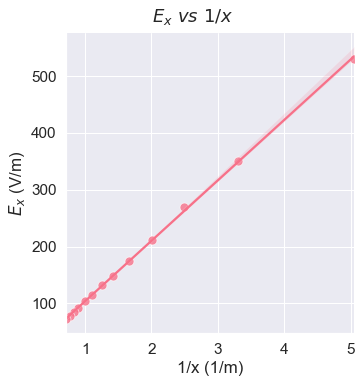

In [2]:
plot2 = (sns.lmplot(x="1/x", y="Ex",data=part3_3, scatter_kws={'s':80, 'linewidth':0.7, 'edgecolor':'w'})
    .set_axis_labels(r"1/x (1/m)",r"$E_x$ (V/m)")
)
# Add title to entire figure since we have only 1 plot
plot2.fig.suptitle(r"$E_x\ vs\ 1/x$", fontsize=18, fontweight="bold", va="baseline") 
plt.show()

```{caution}
These graphs are not the actual graph you need to submit! Please use Logger Pro!
```

## Discussion

- We do not have a discussion part for this lab. But there are few things you need to remember.
- There are several questions asking you to describe the pattern. So, please give your best observations. It must be your own.

```{tip}
One important concepts: The closer the equipotential lines are, the stronger the eletric field in those areas.
```

## Excel Work

- **Please keep track on the schedule. Rules must also be followed.**
- For lab 3, [Click Here](https://docs.google.com/spreadsheets/d/1cmIqJLanpAlZ6kQmgPFBkUN9hX1Z3Y3iBFWBpIDyVzk/edit?usp=sharing).
- For lab 12, [Click Here](https://docs.google.com/spreadsheets/d/1nIeibzET3l4k8WNUURpX4TXzFUnij_JojNM6cykBM6o/edit?usp=sharing).

## Recordings

[Click Here](https://ubc.zoom.us/rec/share/ne1k45TtMiLAxPAr_bcuvr4eEjWzTTjJDWHhsAWu3pda9v3jTf9xdtQ7l-GKXPMy.tXESnOSDgEVzVX4e)